In [1]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

## Training Models

### Linear Regression

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# generate data using known parameters, we will try and learn these parameters during training
# X = 10*torch.randn(size=(1000,1), device=device)
X = 10*torch.randn(size=(1000,1), device=device)
y =  3*(X**2) - 2*X + 4
noise = 150*torch.randn(size=(1000,1), device=device)
y = y + noise


In [4]:
# create training and testing splits
train_split = int(0.8 * len(X))

X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test), X_train, torch.min(y_train)

(800,
 800,
 200,
 200,
 tensor([[  5.4474],
         [-12.8297],
         [ -5.4568],
         [ -7.6828],
         [ 12.0387],
         [  8.0936],
         [  7.7025],
         [ -8.2584],
         [-11.7203],
         [ -9.3801],
         [ 18.9560],
         [ 15.8991],
         [ -6.3230],
         [ 13.5910],
         [-13.5908],
         [  7.4953],
         [ -1.8888],
         [ -4.8466],
         [ -7.3509],
         [  8.5030],
         [-12.8603],
         [-10.8181],
         [  7.0919],
         [ -7.5904],
         [ -9.6449],
         [  7.2380],
         [ 17.4161],
         [ -2.8821],
         [ -5.2669],
         [ -0.5801],
         [-10.8282],
         [  4.4304],
         [  4.8934],
         [ -5.6233],
         [  5.0040],
         [ -7.8693],
         [-19.7076],
         [-10.2539],
         [ -1.4135],
         [  0.3841],
         [ -2.9615],
         [  7.5734],
         [ -4.2291],
         [ -4.5361],
         [  1.1596],
         [ -5.7850],
         [

In [53]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    
    plt.figure(figsize=(10,7))
    
    # plot training data in blue
    plt.scatter(train_data.cpu(), train_labels.cpu(), c="b", s=4, label="Training Data")
    
    # plot test data in red
    plt.scatter(test_data.cpu(), test_labels.cpu(), c="g", s=4, label="Testing Data")
    
    if predictions is not None:
        plt.scatter(test_data.cpu(), predictions.cpu(), c='r', s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})
    
    plt.show()

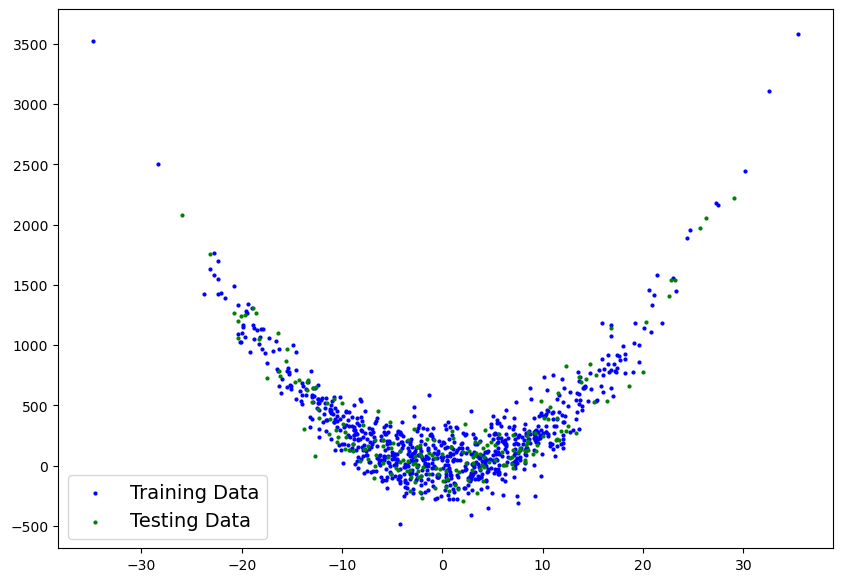

In [6]:
plot_predictions(X_train, y_train, X_test, y_test)

In [7]:
def h_theta(x, params):
    return params[0] + params[1]*x

In [8]:
# cost function = (1/2)* sum(h(x_i)-y_i)^2

def gradient_descent(data, labels, weight, bias, lr, num_batches):
    
    randomidxs = torch.randperm(len(data))
    data = data[randomidxs]
    labels = labels[randomidxs]
    
    batchsize = int(len(data)/num_batches)
    
    for n in range(num_batches):
    
        data_minibatch = data[n*batchsize:(n+1)*batchsize]
        labels_minibatch = labels[n*batchsize:(n+1)*batchsize]
    
        weight_grad = 0
        bias_grad = 0
    
        for x,y in zip(data_minibatch,labels_minibatch):
            pred = h_theta(x.item(),(bias, weight))
            weight_grad += (pred-y.item())*(x.item())
            bias_grad += (pred-y.item())    

        weight = weight - lr*(weight_grad/len(data_minibatch))
        bias = bias - lr*(bias_grad/len(data_minibatch))
        
    return weight, bias

In [9]:
for epoch in range(100):
    weight, bias = gradient_descent(X_train, y_train, 1, 1, 0.01, 8)
    if(epoch % 20 == 0):
        print(f"epoch {epoch}: weight = {weight}, bias = {bias}")

epoch 0: weight = 7.378525138035172, bias = 23.954059708783355
epoch 20: weight = -0.49065131126568495, bias = 24.08805460883896
epoch 40: weight = -9.528175145281933, bias = 23.854038866720423
epoch 60: weight = -9.178903415578043, bias = 23.91978921292284
epoch 80: weight = -7.994540762576718, bias = 23.75213839121897


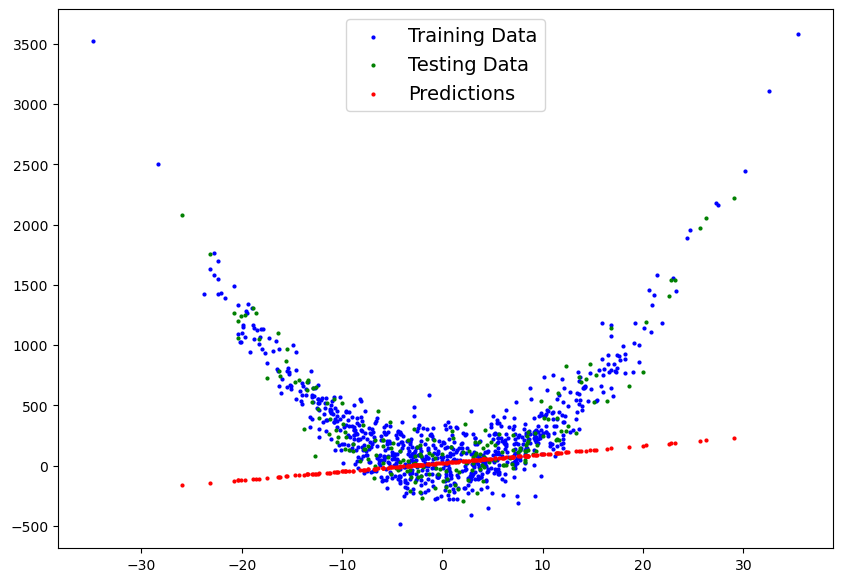

In [10]:
plot_predictions(X_train, y_train, X_test, y_test, h_theta(X_test, [bias, weight]))

### Polynomial Regression

epoch 0: theta1 = 4.450616033573084, theta2 = 0.9873486591610976, theta3 = 1.0119564811723454
epoch 200: theta1 = 2.981408153795319, theta2 = -0.9299359105063001, theta3 = 1.1225084820314215
epoch 400: theta1 = 2.981657382105937, theta2 = -1.5357902216905943, theta3 = 1.2346119517217786
epoch 600: theta1 = 2.9814891061192, theta2 = -1.7272952985280463, theta3 = 1.3450553184449134
epoch 800: theta1 = 2.9811907889032834, theta2 = -1.7877365436222792, theta3 = 1.4543601017287857
epoch 1000: theta1 = 2.9808533428432558, theta2 = -1.8067214143871466, theta3 = 1.5626962851212025
epoch 1200: theta1 = 2.9805055084993906, theta2 = -1.8125940987357496, theta3 = 1.6701226149488175
epoch 1400: theta1 = 2.980156360675678, theta2 = -1.8143202839650752, theta3 = 1.776662610792683
epoch 1600: theta1 = 2.979808753732444, theta2 = -1.8147359439869641, theta3 = 1.8823286090869267
epoch 1800: theta1 = 2.9794635745414344, theta2 = -1.8147381315361022, theta3 = 1.9871293688039113
epoch 2000: theta1 = 2.9791

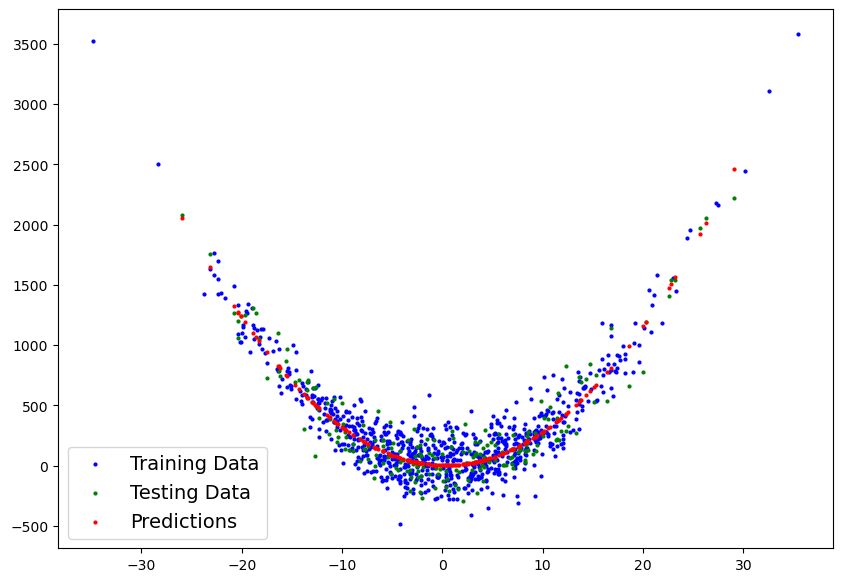

In [21]:
def h_theta_poly(x, params):
    return params[0]*(x**2) + params[1]*x + params[2]

def gradient_descent(data, labels, params, lr, num_batches):

    randomidxs = torch.randperm(len(data))
    data = data[randomidxs]
    labels = labels[randomidxs]

    batchsize = int(len(data)/num_batches)
    
    for n in range(num_batches):
    
        data_minibatch = data[n*batchsize:(n+1)*batchsize]
        labels_minibatch = labels[n*batchsize:(n+1)*batchsize]
    
        theta1_grad = 0
        theta2_grad = 0
        theta3_grad = 0
    
        for x,y in zip(data_minibatch,labels_minibatch):
            pred = h_theta_poly(x.item(),params)
            theta1_grad += (pred-y.item())*(x.item()**2)
            theta2_grad += (pred-y.item())*(x.item())
            theta3_grad += (pred-y.item())

        params[0] = params[0] - lr*(theta1_grad/len(data_minibatch))
        params[1] = params[1] - lr*(theta2_grad/len(data_minibatch))
        params[2] = params[2] - lr*(theta3_grad/len(data_minibatch))

    return params

params = [1,1,1]
for epoch in range(5000):
    params = gradient_descent(X_train, y_train, params, 0.00006, 1)
    if(epoch % 200 == 0):
        print(f"epoch {epoch}: theta1 = {params[0]}, theta2 = {params[1]}, theta3 = {params[2]}")

plot_predictions(X_train, y_train, X_test, y_test, h_theta_poly(X_test, params))